In [41]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

In [42]:
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")


In [43]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [44]:
df = df.drop(['customerID'], axis=1)

In [45]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df = df.dropna()

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 
 17  

In [47]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [48]:
df['gender'].value_counts()

gender
Male      3549
Female    3483
Name: count, dtype: int64

In [50]:
X = df.drop('Churn', axis=1)
y = df['Churn']

In [51]:
df['Churn'].value_counts()

Churn
No     5163
Yes    1869
Name: count, dtype: int64

In [52]:
df.shape

(7032, 20)

In [54]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_dist(df, column_name):
   plt.figure(figsize=(12,4))
   plt.subplot(1, 2, 1)
   sns.histplot(df[column_name], kde=True)
   plt.title(f'Distribution of {column_name}')

   column_mean = df[column_name].mean()
   column_median = df[column_name].median()
   plt.axvline(column_mean, color='red', linestyle='--', label='Mean')
   plt.axvline(column_median, color='green', linestyle='--', label='Median')
   plt.legend()
   plt.subplot(1, 2, 2)
   sns.boxplot(x=df[column_name])
   plt.title(f'Boxplot of {column_name}')
   plt.show()

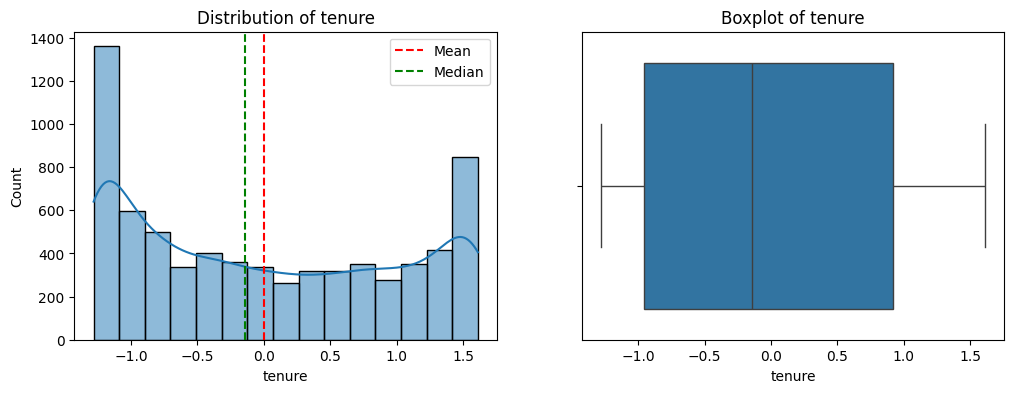

In [105]:
plot_dist(df, 'tenure')

Text(0.5, 1.0, 'Correlation Heatmap')

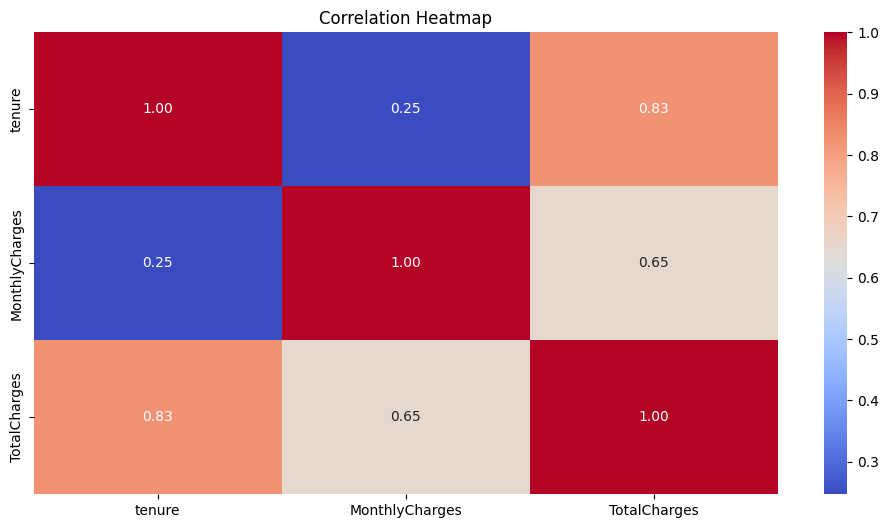

In [57]:
plt.figure(figsize=(12, 6))
sns.heatmap(df[['tenure','MonthlyCharges','TotalCharges']].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
# plt.show()

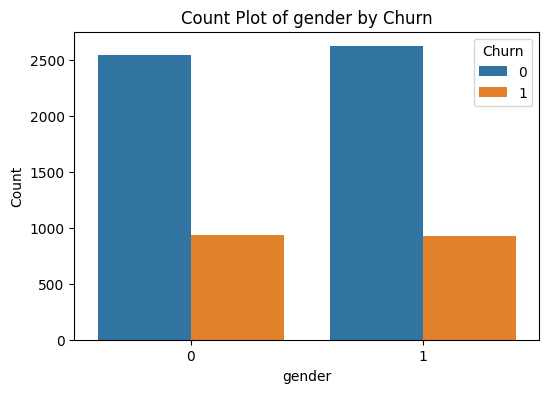

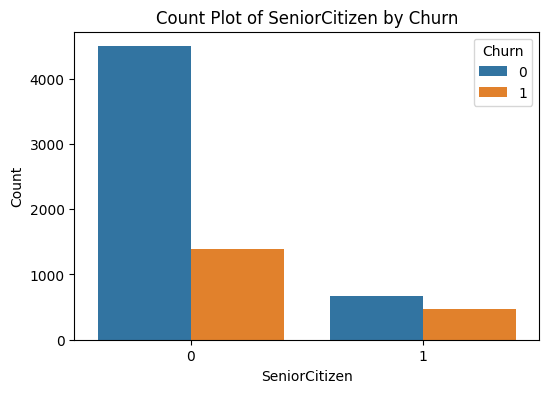

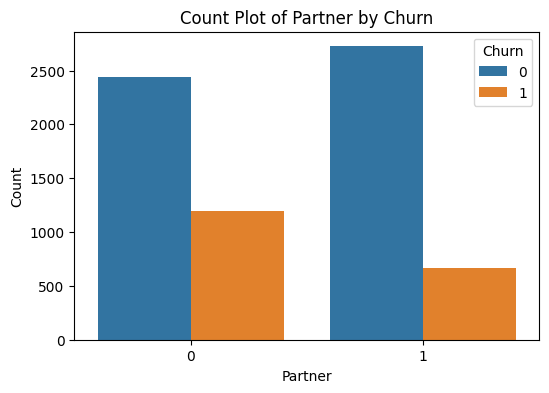

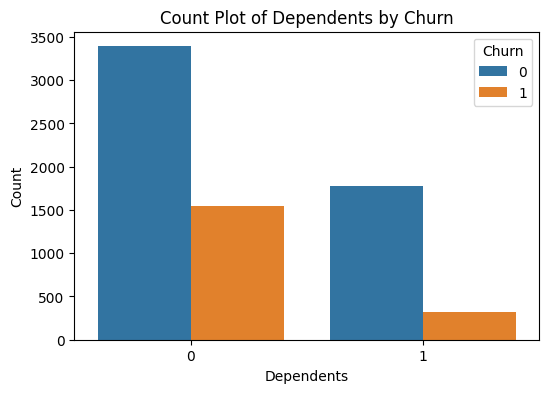

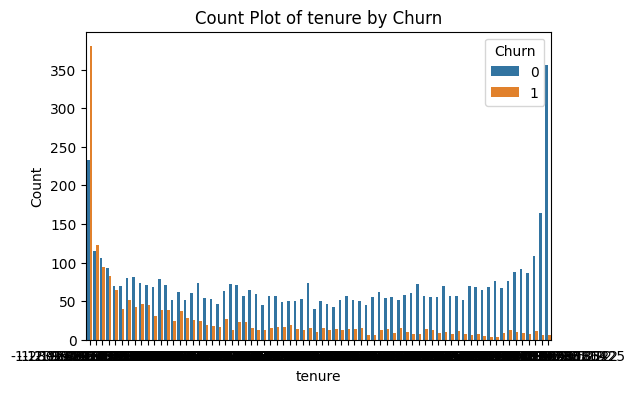

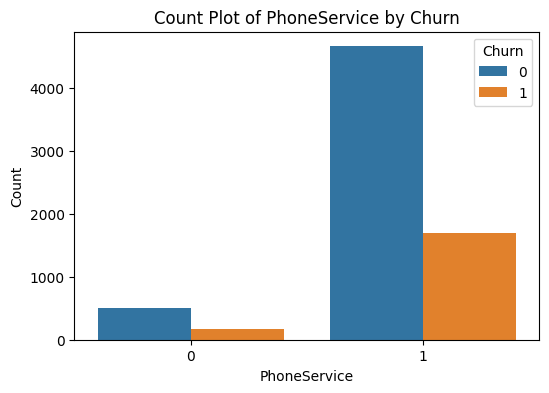

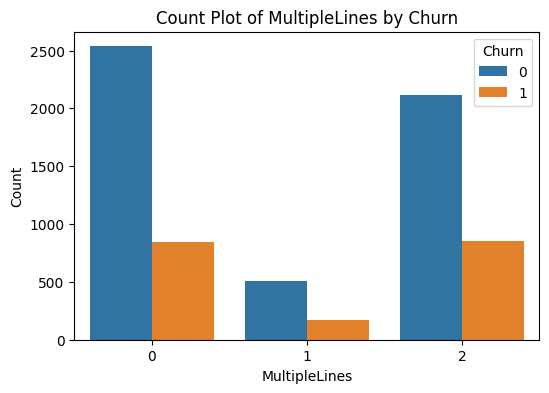

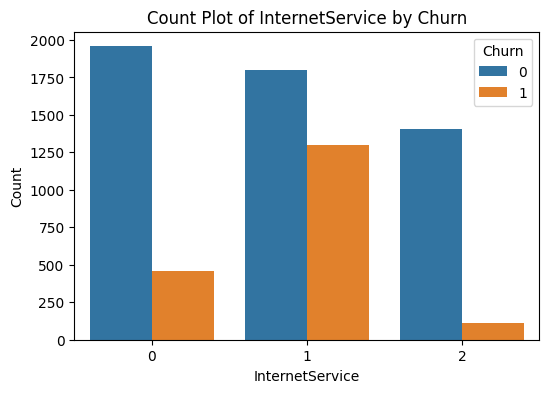

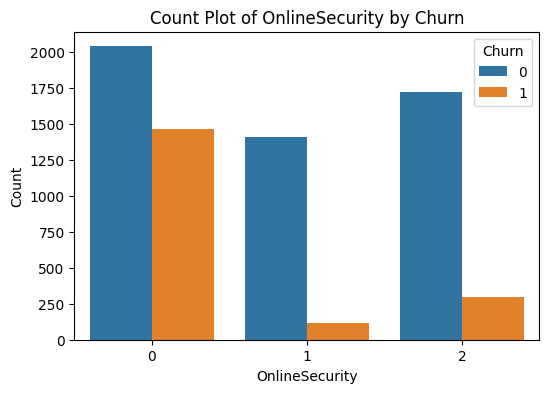

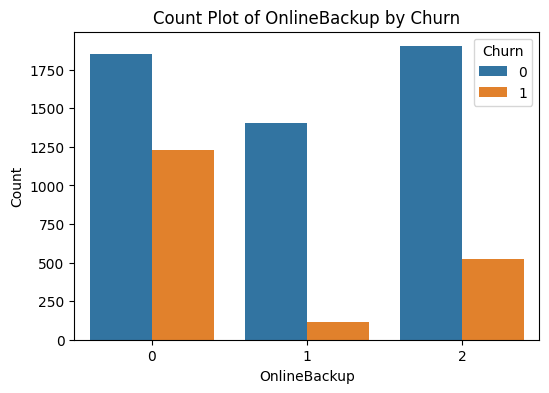

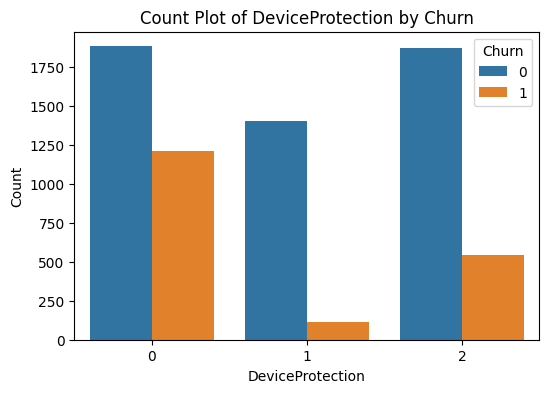

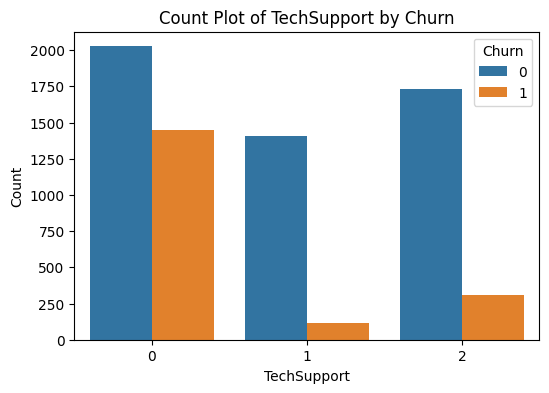

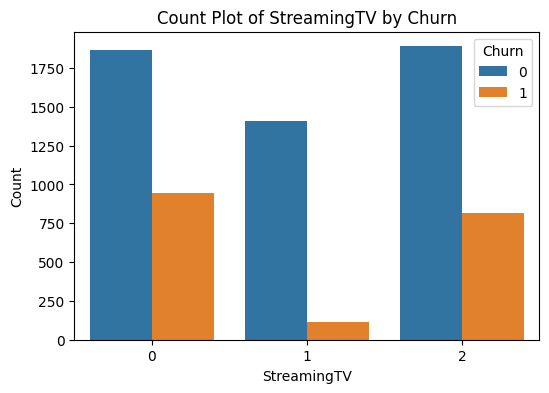

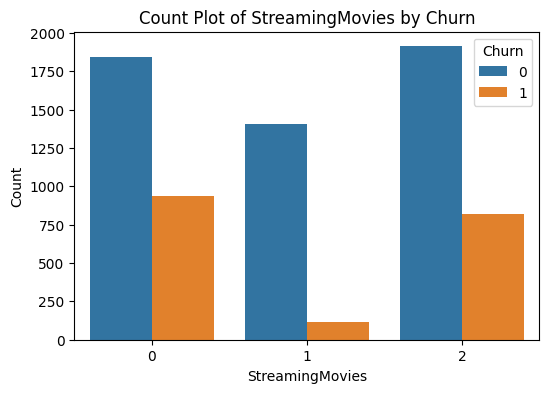

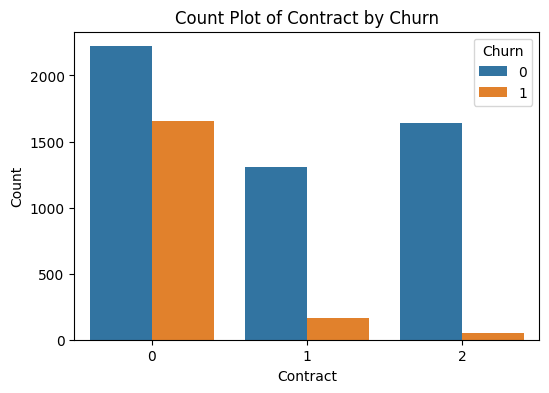

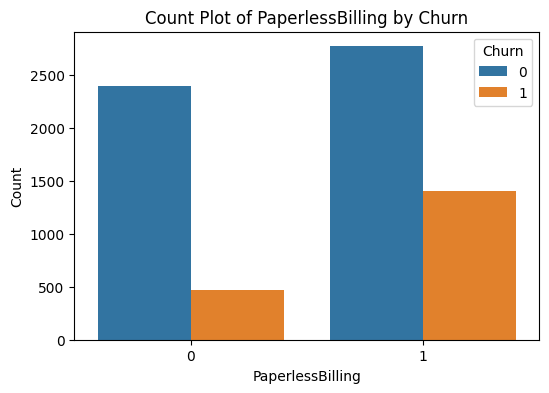

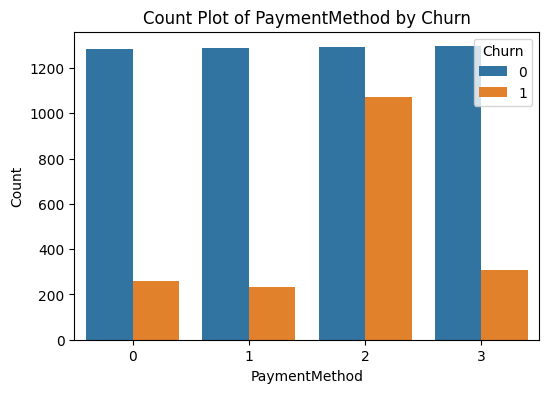

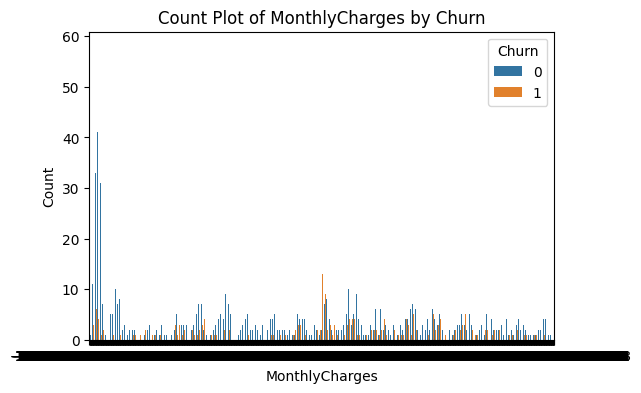

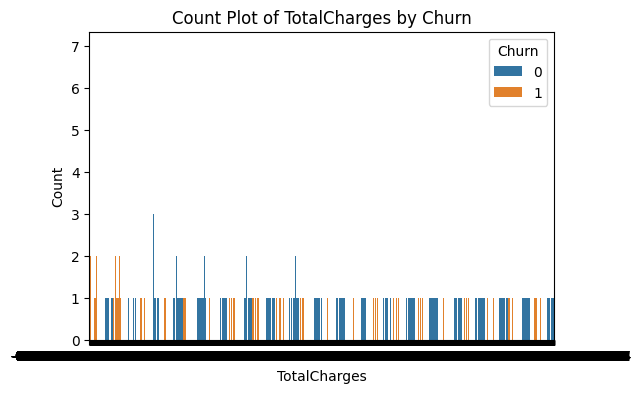

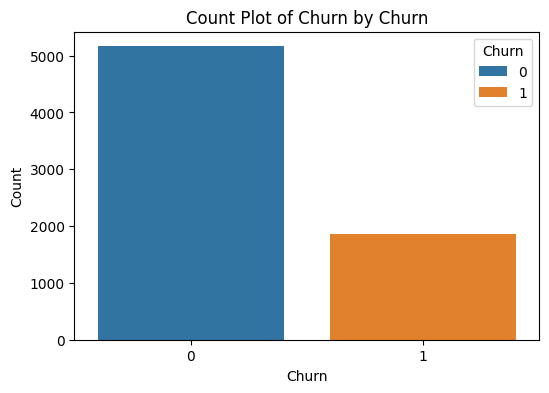

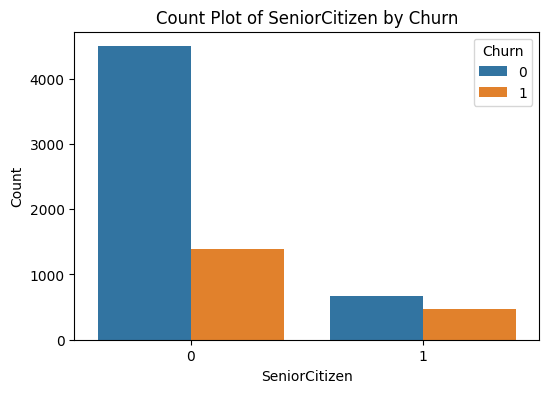

In [104]:
categorial_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist() + ['SeniorCitizen']
for col in categorial_columns:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=df[col], hue=df['Churn'])
    plt.title(f'Count Plot of {col} by Churn')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.legend(title='Churn', loc='upper right')
    plt.show()


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 
 17  

In [60]:
df['Churn'] = df['Churn'].replace({"Yes": 1, "No": 0})

C:\Users\Harsh Vardhan\AppData\Local\Temp\ipykernel_3404\196801821.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Churn'] = df['Churn'].replace({"Yes": 1, "No": 0})


In [61]:
objects_columns = df.select_dtypes(include = "object").columns
objects_columns

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object')

In [62]:
encoders = {}

for column in objects_columns:
    label_encoder = LabelEncoder()
    df[column] = label_encoder.fit_transform(df[column])
    encoders[column] = label_encoder

In [63]:
encoders

{'gender': LabelEncoder(),
 'Partner': LabelEncoder(),
 'Dependents': LabelEncoder(),
 'PhoneService': LabelEncoder(),
 'MultipleLines': LabelEncoder(),
 'InternetService': LabelEncoder(),
 'OnlineSecurity': LabelEncoder(),
 'OnlineBackup': LabelEncoder(),
 'DeviceProtection': LabelEncoder(),
 'TechSupport': LabelEncoder(),
 'StreamingTV': LabelEncoder(),
 'StreamingMovies': LabelEncoder(),
 'Contract': LabelEncoder(),
 'PaperlessBilling': LabelEncoder(),
 'PaymentMethod': LabelEncoder()}

In [75]:
import pickle
with open("encoder.pkl", "wb") as f:
    pickle.dump(encoders, f)

In [65]:
from sklearn.preprocessing import StandardScaler
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [69]:
y_train.value_counts()

Churn
No     4130
Yes    1495
Name: count, dtype: int64

In [80]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

# Split data
X = df.drop(columns=['Churn'])
y = df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Original training class distribution:")
print(y_train.value_counts())

# Define models
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(random_state=42)
}

# Hyperparameter grids
hyperparameters = {
    "Random Forest": {
        "n_estimators": [50, 100, 200],
        "max_depth": [5, 10, None],
    },
    "XGBoost": {
        "learning_rate": [0.01, 0.1, 0.2],
        "max_depth": [3, 5, 7],
    }
}

# Grid search and store best models
best_models = {}
for model_name, model in models.items():
    print(f"Tuning {model_name}......")
    grid = GridSearchCV(estimator=model, param_grid=hyperparameters[model_name], cv=5, scoring="accuracy")
    grid.fit(X_train, y_train)
    best_models[model_name] = grid.best_estimator_
    print(f"Best parameters for {model_name}: {grid.best_params_}")
    print(f"Best Accuracy for {model_name}: {grid.best_score_: .2f}\n")


Original training class distribution:
Churn
0    4130
1    1495
Name: count, dtype: int64
Tuning Random Forest......
Best parameters for Random Forest: {'max_depth': 5, 'n_estimators': 100}
Best Accuracy for Random Forest:  0.80

Tuning XGBoost......
Best parameters for XGBoost: {'learning_rate': 0.1, 'max_depth': 3}
Best Accuracy for XGBoost:  0.81



In [81]:
best_models = {}
for model_name , model in models.items():
    print(f"Tunning {model_name}......")
    grid = GridSearchCV(estimator=model, param_grid=hyperparameters[model_name], cv=5, scoring = "accuracy")
    grid.fit(X_train, y_train)
    best_models[model_name] =grid.best_estimator_
    print(f"Best parameters for {model_name} : {grid.best_params_}")
    print(f"Best Accuracy for {model_name} : {grid.best_score_: .2f}\n")

Tunning Random Forest......
Best parameters for Random Forest : {'max_depth': 5, 'n_estimators': 100}
Best Accuracy for Random Forest :  0.80

Tunning XGBoost......
Best parameters for XGBoost : {'learning_rate': 0.1, 'max_depth': 3}
Best Accuracy for XGBoost :  0.81



In [82]:
with open("best_model.pkl", "wb") as f:
    pickle.dump(best_models['Random Forest'], f)
    

In [83]:
with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

In [ ]:
import joblib

loaded_model = joblib.load("best_model.pkl")
encoders = joblib.load("encoder.pkl")
scaler_data = joblib.load("scaler.pkl")


In [95]:
y_test_pred = best_models['Random Forest'].predict(X_test)
y_test_prob = best_models['Random Forest'].predict_proba(X_test)[:, 1]

In [96]:
y_test_pred

array([0, 0, 1, ..., 0, 0, 0], shape=(1407,))

In [97]:
y_test_prob

array([0.01550489, 0.12277642, 0.52764424, ..., 0.13469799, 0.18679758,
       0.01268098], shape=(1407,))

In [98]:
print(f"Accuracy : ", accuracy_score(y_test, y_test_pred))
print(f"ROC - AUC Score : ", roc_auc_score(y_test, y_test_pred))
print(f"Confusion Matrix : \n", confusion_matrix(y_test, y_test_pred))
print(f"Classification Report : \n", classification_report(y_test, y_test_pred))

Accuracy :  0.7917555081734187
ROC - AUC Score :  0.6756656019795931
Confusion Matrix : 
 [[954  79]
 [214 160]]
Classification Report : 
               precision    recall  f1-score   support

           0       0.82      0.92      0.87      1033
           1       0.67      0.43      0.52       374

    accuracy                           0.79      1407
   macro avg       0.74      0.68      0.69      1407
weighted avg       0.78      0.79      0.78      1407



In [ ]:
def make_prediction(input_data):
    input_df = pd.DataFrame([input_data])
    for col, encoder in encoders.items():
        input_df[col] = encoder.transform(input_df[col])
    numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
    input_df[numerical_cols] = scaler_data.transform(input_df[numerical_cols])
    prediction = loaded_model.predict(input_df)[0]
    probability = loaded_model.predict_proba(input_df)[0, 1]
    return "Churn" if prediction == 1 else "No Churn", probability

In [100]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [101]:
example_input = {
    'gender': 'Female',
    'SeniorCitizen': 0,
    'Partner': 'Yes',
    'Dependents': 'No',
    'tenure': 1,
    'PhoneService': 'No',
    'MultipleLines': 'No phone service',
    'InternetService': 'DSL',
    'OnlineSecurity': 'No',
    'OnlineBackup': 'Yes',
    'DeviceProtection': 'No',
    'TechSupport': 'No',
    'StreamingTV': 'No',
    'StreamingMovies': 'No',
    'Contract': 'Month-to-month',
    'PaperlessBilling': 'Yes',
    'PaymentMethod': 'Electronic check',
    'MonthlyCharges': 29.85,
    'TotalCharges': 29.85
}

In [102]:
prediction, prob = make_prediction(example_input)

In [103]:
print(f"Prediction: {prediction}, Probability : {prob : .2f}")

Prediction: Churn, Probability :  0.54
